<a href="https://colab.research.google.com/github/Tanjul5/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

First of all import all libraries

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Let's Mount the Drive and analyse the data..

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Hotel_book_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [5]:
Hotel_book_df.describe

<bound method NDFrame.describe of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...    

In [6]:
#checking top 10 rows
Hotel_book_df.head

<bound method NDFrame.head of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

In [7]:
#checking last 10 rows 
Hotel_book_df.tail

<bound method NDFrame.tail of                hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...        

In [8]:
#check columns name
Hotel_book_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
Hotel_book_df.shape

(119390, 32)

In [10]:
Hotel_book_df.fillna(Hotel_book_df.mean())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [11]:
#Replacing NUll value with zero for convinience

Hotel_book_df.fillna(0, inplace=True)

In [12]:
#check duplicate rows
duplicate_rows_df = Hotel_book_df[Hotel_book_df.duplicated()].shape

print(f"the no. of duplicate rows :" , duplicate_rows_df)

the no. of duplicate rows : (31994, 32)


In [13]:
#drop duplicate values
df=Hotel_book_df.drop_duplicates()
df.shape

(87396, 32)

**some observations**

27.4 % of the people have cancelled their booking as per the dataset.

Avg. lead time is 80 days.

Only 4% of the guests are repeated.

Each booking has on an average 1.8 adults and 0.13 children

# **what is the count of each type of Hotels ?**

In [14]:
hotel_list = Hotel_book_df['hotel'].value_counts()
hotel_list
hotel_count = Hotel_book_df['hotel'].value_counts().index
hotel_count

Index(['City Hotel', 'Resort Hotel'], dtype='object')

The dataset describes two types of hotels, City and Resort hotel

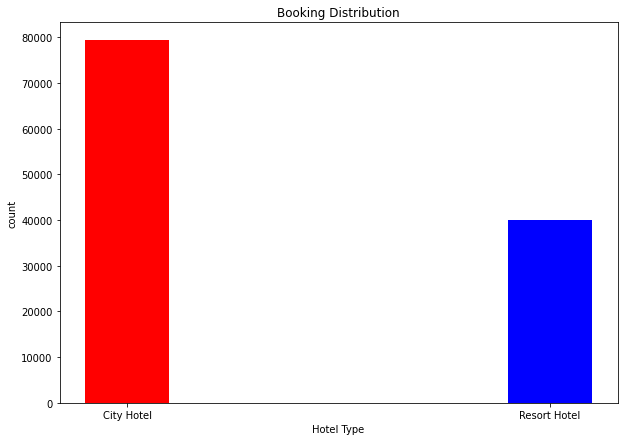

In [15]:
# creating the bar graph
plt.figure(figsize = (10,7))
plt.bar(hotel_count, hotel_list, color =['red','blue'], width = 0.2)
plt.xlabel("Hotel Type")
plt.ylabel("count")
plt.title('Booking Distribution')
plt.show()

the maximum number of customers prefer to book city hotel than the resort hotel.

In [16]:
top_10_countries = Hotel_book_df[Hotel_book_df['is_canceled']==0]['country'].value_counts()[:10]
top_10_countries

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
Name: country, dtype: int64

Text(0.5, 1.0, 'Booking per year')

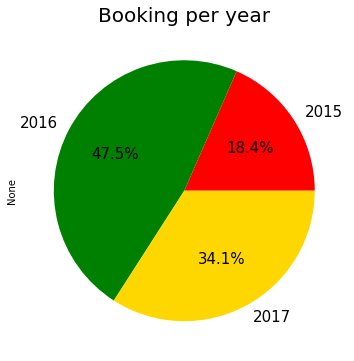

In [17]:
bookper_year=Hotel_book_df.groupby('arrival_date_year').size().plot(kind='pie', fontsize=15, autopct='%.1f%%',  figsize=(6, 6), colors = [ 'red', 'green', 'gold'],textprops={'color':"black"}) 
plt.title('Booking per year',fontsize=20)


Text(0.5, 0, 'Arrival Month')

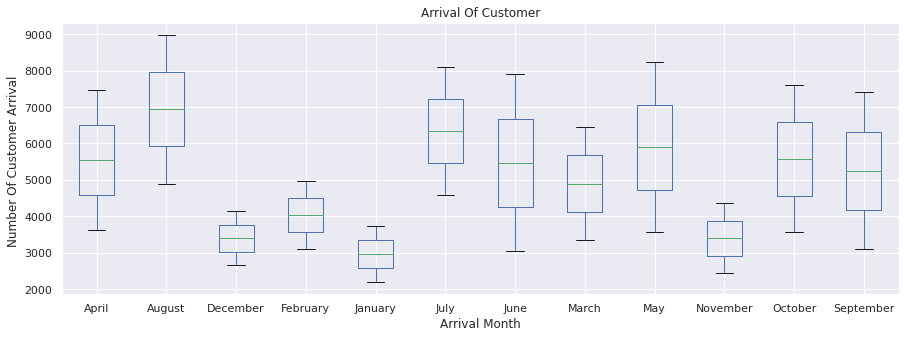

In [27]:
Hotel_book_df.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].size().unstack().plot(kind="box")
plt.title('Arrival Of Customer')
plt.ylabel('Number Of Customer Arrival ')
plt.xlabel('Arrival Month')

Text(0, 0.5, 'Count')

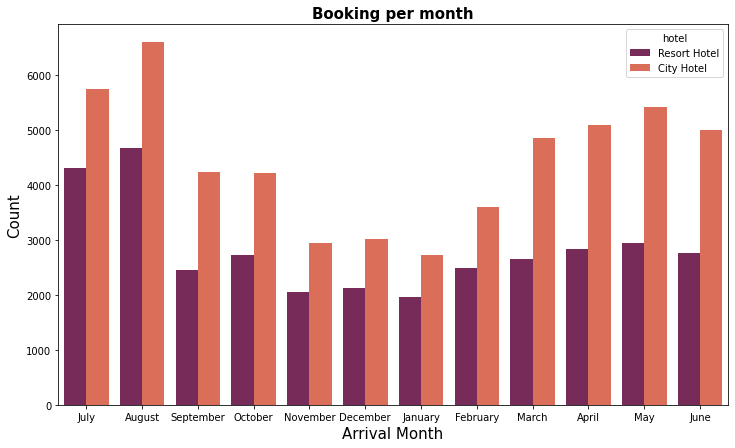

In [18]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x= 'arrival_date_month',hue = 'hotel',data = df,palette= 'rocket')
plt.title ('Booking per month',weight = 'bold', size = 15)
plt.xlabel("Arrival Month",size = 15)
plt.ylabel('Count',size = 15)

Text(0, 0.5, 'Counts')

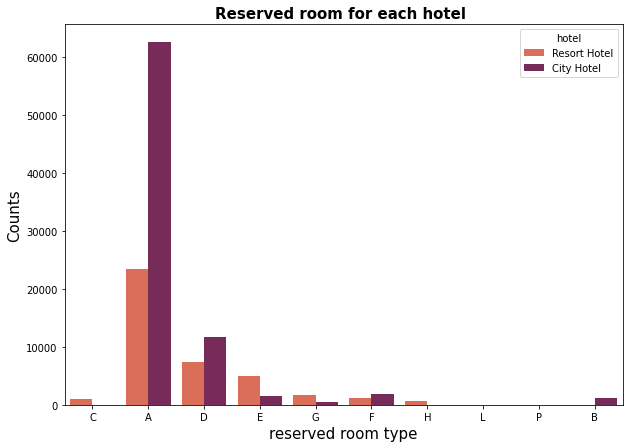

In [19]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='reserved_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('Reserved room for each hotel ', weight='bold',size = 15)
plt.xlabel('reserved room type',size = 15)
plt.ylabel('Counts',size = 15)

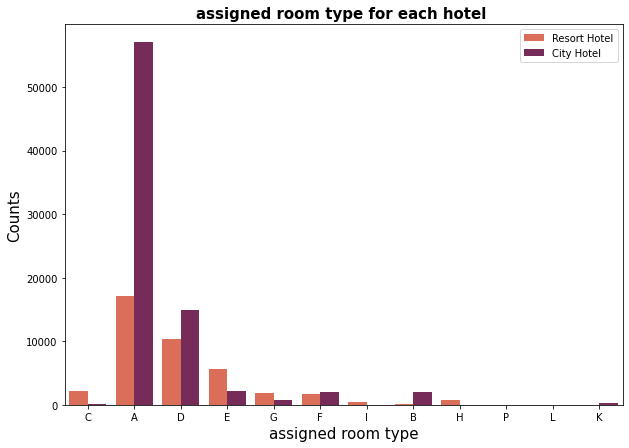

In [20]:
fig, ax = plt.subplots(figsize = (10,7))    
sns.countplot(x ='assigned_room_type', data = Hotel_book_df, hue = "hotel", palette = 'rocket_r')
plt.title('assigned room type for each hotel ', weight='bold',size = 15)
plt.xlabel('assigned room type',size = 15)
plt.ylabel('Counts',size = 15)
plt.legend(loc='upper right')

Text(0, 0.5, 'Count')

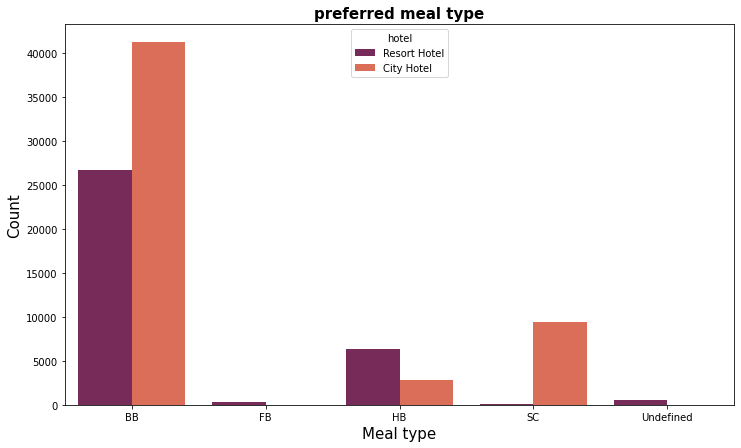

In [21]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x= 'meal',hue = 'hotel',data = df,palette= 'rocket')
plt.title ('preferred meal type',weight = 'bold', size = 15)
plt.xlabel("Meal type",size = 15)
plt.ylabel('Count',size = 15)

Text(0, 0.5, 'No. of Bookings')

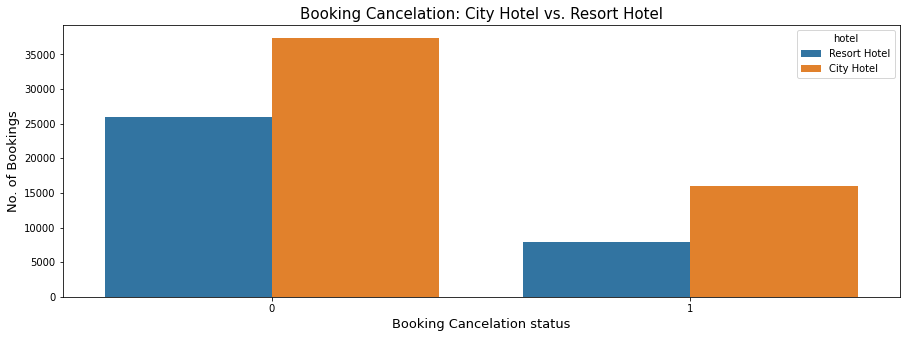

In [22]:
plt.rcParams['figure.figsize']= (15,5)
sns.countplot(data = df, x = 'is_canceled', hue = 'hotel')
plt.title('Booking Cancelation: City Hotel vs. Resort Hotel',fontsize=15)
plt.xlabel('Booking Cancelation status', fontsize=13)
plt.ylabel('No. of Bookings', fontsize=13)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


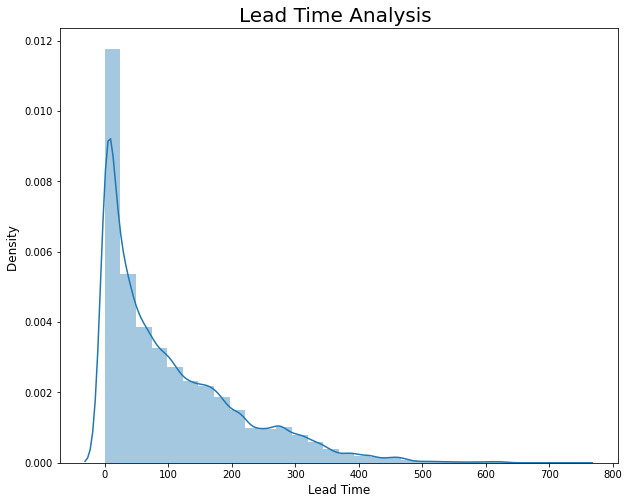

In [24]:
#lead time for booking 

plt.figure(figsize=(10, 8))
ax=sns.distplot(Hotel_book_df['lead_time'],bins=30)
plt.ylabel("Density ", fontsize=12)
plt.xlabel("Lead Time", fontsize=12)
plt.title("Lead Time Analysis ",fontsize=20)
plt.show()

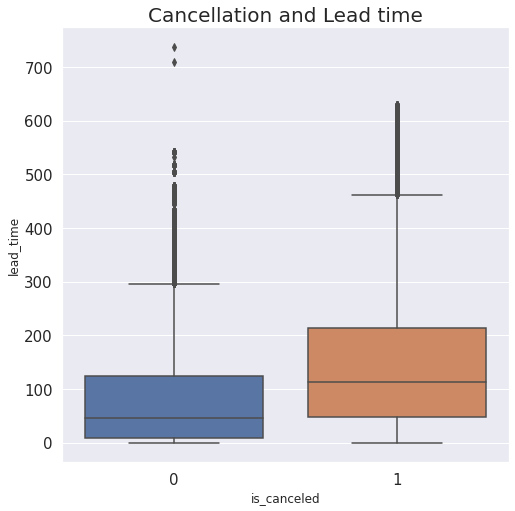

In [26]:
# depicting groups of Cancellation through their quartiles using boxplot
# 0 - not cancelled, 1- is cancelled
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid",font='sans-serif')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Cancellation and Lead time", fontsize=20)
sns.boxplot(x='is_canceled',y='lead_time',data=Hotel_book_df)

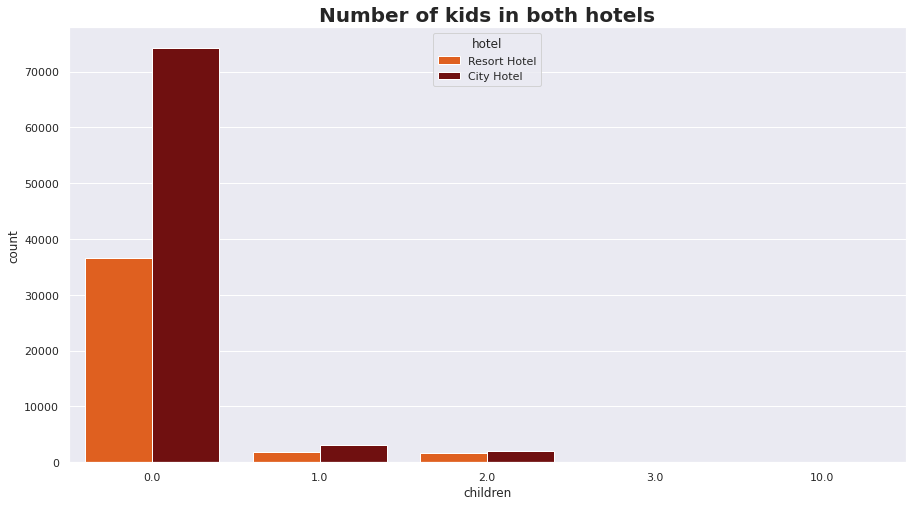

In [37]:
plt.figure(figsize=(15, 8))
sns.countplot(x='children',hue='hotel', data=Hotel_book_df, palette='gist_heat_r')
plt.title("Number of kids in both hotels",fontweight="bold", size=20)
plt.show()

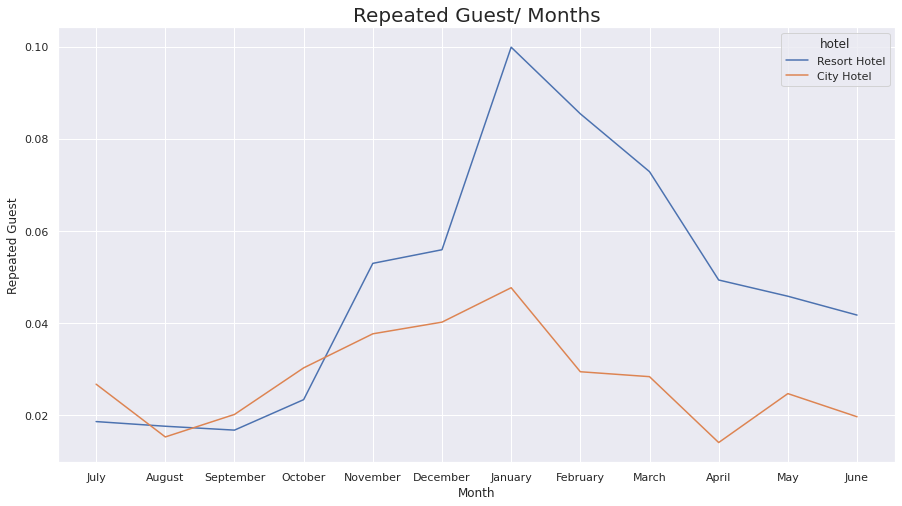

In [38]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = "arrival_date_month", y="is_repeated_guest", hue="hotel", data=Hotel_book_df, ci=None).set_title('Repeated Guest/ Months', fontsize=20)
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Repeated Guest', fontsize=12)
plt.show()


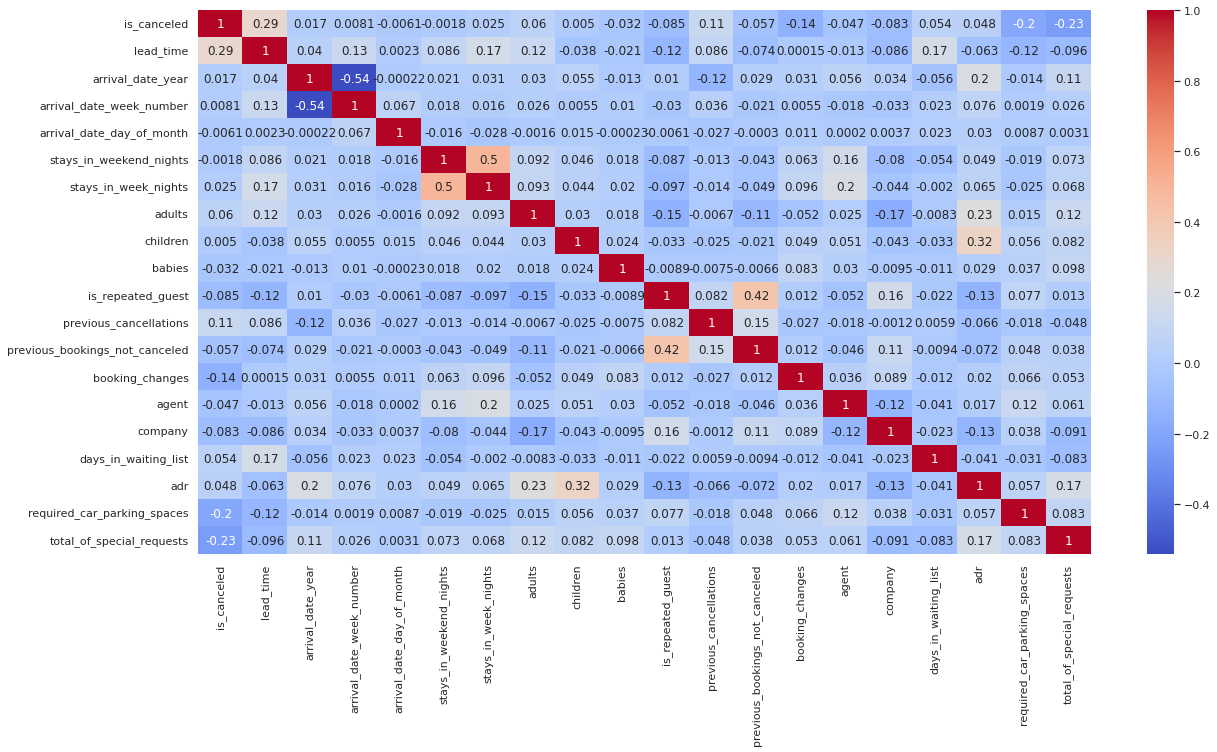

In [40]:
plt.figure(figsize=(20,10))
c=Hotel_book_df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)